In [1]:
import pandas as pd
data = pd.read_csv(r'digit-recognizer-train.csv')

In [2]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
x = data.iloc[:,1:]
y = data.iloc[:,0]

### 方差

In [4]:
from sklearn.feature_selection import VarianceThreshold
VT = VarianceThreshold()
x_VarianceThreshold = VT.fit_transform(x)

In [5]:
x_VarianceThreshold.shape
#(VT.variances_!=0).sum()

(42000, 708)

## 滤波方法

### 卡方

In [6]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [7]:
x_chi2 = SelectKBest(chi2, k=400).fit_transform(x_VarianceThreshold,y)

In [8]:
x_chi2.shape

(42000, 400)

In [9]:
chi2_values, p_values = chi2(x_VarianceThreshold, y)

In [10]:
chi2_values

array([9.66179710e+02, 1.92173151e+03, 1.95589370e+03, 8.14955710e+01,
       1.46436548e+02, 5.03375635e+02, 4.05446193e+03, 1.01590104e+04,
       1.46383248e+04, 1.96142344e+04, 4.32258822e+04, 6.15558662e+04,
       6.86005996e+04, 6.26676356e+04, 5.25321455e+04, 4.66335232e+04,
       4.07029439e+04, 4.41656140e+04, 3.90423085e+04, 2.33657817e+04,
       1.73252741e+04, 5.92152792e+03, 4.04530964e+03, 1.94028426e+03,
       5.85746193e+02, 2.65772507e+02, 2.62245425e+03, 1.55176604e+03,
       1.16886523e+04, 3.41972235e+04, 7.19008537e+04, 1.30779065e+05,
       2.11967765e+05, 3.36194469e+05, 5.05714852e+05, 7.25319082e+05,
       9.35585984e+05, 1.09703153e+06, 1.15651989e+06, 1.08992447e+06,
       9.21154382e+05, 7.03378787e+05, 4.35328877e+05, 2.20985314e+05,
       1.06151169e+05, 3.33881242e+04, 8.03658705e+03, 1.43898707e+03,
       1.18388307e+03, 5.49514894e+02, 1.65372400e+03, 6.70848144e+03,
       2.62176107e+04, 6.91780171e+04, 1.63632429e+05, 3.13056254e+05,
      

In [11]:
p_values

array([3.37556612e-202, 0.00000000e+000, 0.00000000e+000, 8.14984992e-014,
       4.82170664e-027, 1.08842996e-102, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       2.39754926e-120, 4.63737072e-052, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 2.91066191e-304,
       3.65562117e-249, 1.41443562e-112, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0

### F检验

In [12]:
from sklearn.feature_selection import f_classif

In [13]:
x_f_classif = SelectKBest(f_classif, k=400).fit_transform(x_VarianceThreshold,y)

In [14]:
x_f_classif.shape

(42000, 400)

In [15]:
f_statistic, p_values = chi2(x_VarianceThreshold, y)

In [16]:
f_statistic

array([9.66179710e+02, 1.92173151e+03, 1.95589370e+03, 8.14955710e+01,
       1.46436548e+02, 5.03375635e+02, 4.05446193e+03, 1.01590104e+04,
       1.46383248e+04, 1.96142344e+04, 4.32258822e+04, 6.15558662e+04,
       6.86005996e+04, 6.26676356e+04, 5.25321455e+04, 4.66335232e+04,
       4.07029439e+04, 4.41656140e+04, 3.90423085e+04, 2.33657817e+04,
       1.73252741e+04, 5.92152792e+03, 4.04530964e+03, 1.94028426e+03,
       5.85746193e+02, 2.65772507e+02, 2.62245425e+03, 1.55176604e+03,
       1.16886523e+04, 3.41972235e+04, 7.19008537e+04, 1.30779065e+05,
       2.11967765e+05, 3.36194469e+05, 5.05714852e+05, 7.25319082e+05,
       9.35585984e+05, 1.09703153e+06, 1.15651989e+06, 1.08992447e+06,
       9.21154382e+05, 7.03378787e+05, 4.35328877e+05, 2.20985314e+05,
       1.06151169e+05, 3.33881242e+04, 8.03658705e+03, 1.43898707e+03,
       1.18388307e+03, 5.49514894e+02, 1.65372400e+03, 6.70848144e+03,
       2.62176107e+04, 6.91780171e+04, 1.63632429e+05, 3.13056254e+05,
      

In [17]:
p_values

array([3.37556612e-202, 0.00000000e+000, 0.00000000e+000, 8.14984992e-014,
       4.82170664e-027, 1.08842996e-102, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       2.39754926e-120, 4.63737072e-052, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 2.91066191e-304,
       3.65562117e-249, 1.41443562e-112, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0

### 互信息

In [18]:
from sklearn.feature_selection import mutual_info_regression as MIC

In [19]:
mi = MIC(x_VarianceThreshold,y)
k = mi.shape[0] - (mi<=0).sum()
x_MIC = SelectKBest(MIC, k=k).fit_transform(x_VarianceThreshold,y)
x_MIC.shape

(42000, 631)

## 包装方法

In [20]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier as RFC 
from sklearn.model_selection import cross_val_score

In [21]:
rfc = RFC(n_estimators = 10, random_state=0)
selector = RFE(rfc, n_features_to_select=400, step=30).fit(x_MIC, y)
selector.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,

In [22]:
selector.ranking_

array([9, 8, 7, 6, 6, 6, 7, 7, 7, 7, 7, 4, 7, 6, 2, 5, 3, 3, 5, 5, 6, 4,
       5, 6, 7, 7, 7, 7, 7, 6, 3, 4, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       5, 4, 6, 7, 8, 6, 3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       4, 4, 6, 8, 8, 8, 6, 6, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 3, 5, 9, 5, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 5, 9, 7, 6, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 9, 9, 9, 6, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 6, 8, 6, 5, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 6, 8, 8, 7,
       5, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 9, 7, 7, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 5, 9, 9, 5, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 6, 9, 9, 9, 6, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 5, 9, 9, 8, 4,

In [23]:
x_wrapper = selector.transform(x_MIC)

In [24]:
cross_val_score(rfc, x_wrapper, y, cv=5).mean()

0.9417857142857142

## 嵌入方法

In [25]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RFC 
from sklearn.model_selection import cross_val_score

In [26]:
rfc = RFC(n_estimators = 10, random_state=0)
x_Embedding = SelectFromModel(rfc, threshold=0.002).fit_transform(x_MIC, y)
x_Embedding.shape

(42000, 177)

#### 学习曲线

In [27]:
import numpy as np
import matplotlib.pyplot as plt

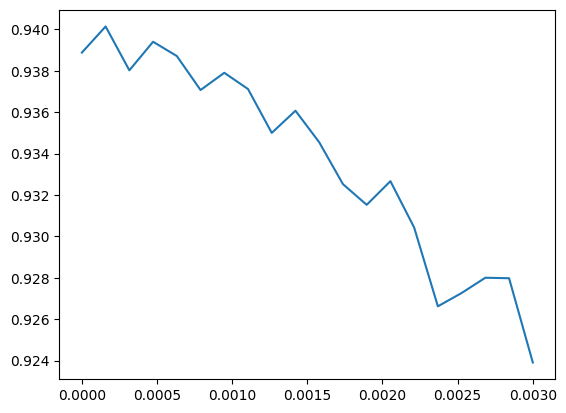

In [28]:
threshold = np.linspace(0,0.003,20)
score = []
for i in threshold:
    x_Embedding  = SelectFromModel(rfc, threshold=i).fit_transform(x_MIC, y)
    once = cross_val_score(rfc, x_Embedding, y, cv=5).mean()
    score.append(once)
plt.plot(threshold, score)
plt.show()

#### 细调参数

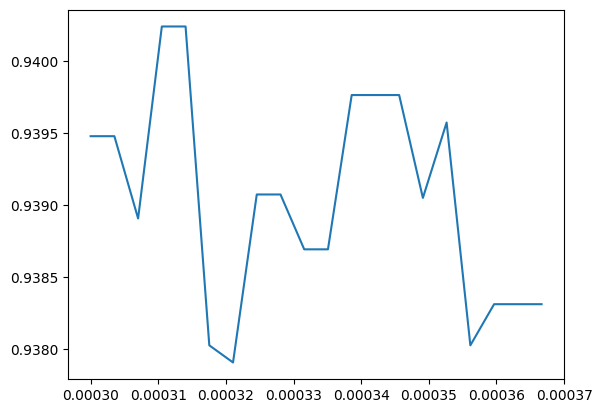

In [29]:
threshold = np.linspace(0.0003,0.00036667,20)
score = []
for i in threshold:
    x_Embedding  = SelectFromModel(rfc, threshold=i).fit_transform(x_MIC, y)
    once = cross_val_score(rfc, x_Embedding, y, cv=5).mean()
    score.append(once)
plt.plot(threshold, score)
plt.show()

In [30]:
x_Embedding  = SelectFromModel(rfc, threshold=0.000318).fit_transform(x_MIC, y)
x_Embedding.shape

(42000, 374)

#### norm_order

In [31]:
from sklearn.linear_model import LogisticRegression as LR

In [32]:
lr = LR(solver="liblinear", C=0.9, random_state=20)
cross_val_score(lr, x_MIC[:1000, :], y[:1000], cv=5).mean()

0.8140000000000001

In [33]:
x_Embedding = SelectFromModel(lr, norm_order=1).fit_transform(x_Embedding[:1000,:], y[:1000])
cross_val_score(lr, x_Embedding[:1000,:], y[:1000], cv=5).mean()

0.834